# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [48]:
# 新增欄位 "equal_freq_age", 對年齡做等頻劃分
app_train['AMT_CREDIT_qual_cut'] = pd.cut(app_train['AMT_CREDIT'], 6)
print(app_train['AMT_CREDIT_qual_cut'].value_counts())
print(type(app_train['AMT_CREDIT_qual_cut']))

(40995.0, 712500.0]       209142
(712500.0, 1380000.0]      85000
(1380000.0, 2047500.0]     11924
(2047500.0, 2715000.0]      1401
(2715000.0, 3382500.0]        30
(3382500.0, 4050000.0]        14
Name: AMT_CREDIT_qual_cut, dtype: int64
<class 'pandas.core.series.Series'>


(35.099, 39.959]    41758
(39.959, 44.819]    40350
(30.238, 35.099]    38430
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(25.378, 30.238]    33127
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(20.469, 25.378]    13679
(64.26, 69.121]     11977
Name: DAYS_BIRTH_YEAR_DISCRET, dtype: int64


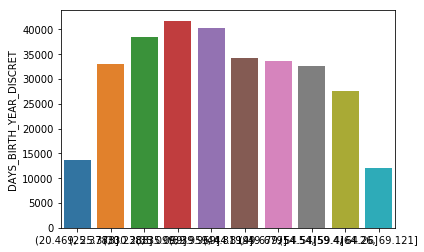

In [63]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

app_train['DAYS_BIRTH_YEAR'] = app_train['DAYS_BIRTH']/365
app_train['DAYS_BIRTH_YEAR_DISCRET'] = pd.cut(app_train['DAYS_BIRTH_YEAR'],10)
print(app_train['DAYS_BIRTH_YEAR_DISCRET'].value_counts())
#pd(app_train['DAYS_BIRTH_YEAR_DISCRET'].value_counts())
QQ=pd.DataFrame(app_train['DAYS_BIRTH_YEAR_DISCRET'].value_counts())
QQQ=QQ.sort_index()

QQQ

px = QQQ.index.values
py = QQQ['DAYS_BIRTH_YEAR_DISCRET']
sns.barplot(px, py)

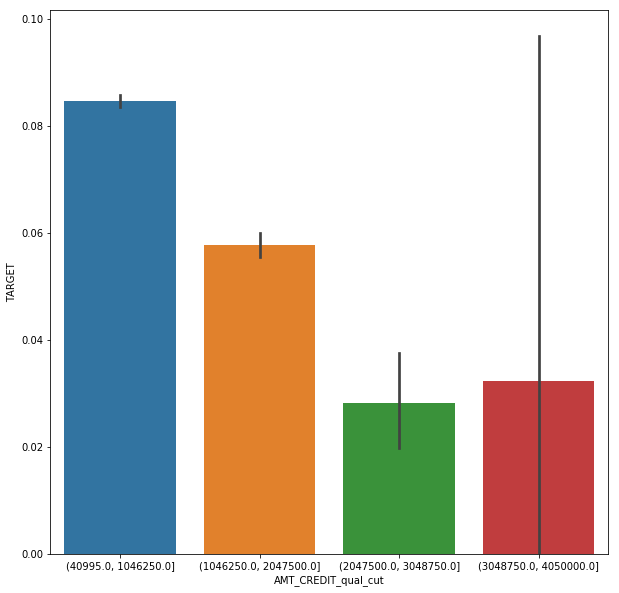

In [21]:
plt.figure(figsize=(10,10))
ax = sns.barplot(app_train['AMT_CREDIT_qual_cut'],app_train['TARGET'])


In [34]:
app_train['TARGET']

0         1
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        1
27        0
28        0
29        0
         ..
307481    1
307482    0
307483    0
307484    0
307485    0
307486    0
307487    0
307488    0
307489    1
307490    0
307491    0
307492    0
307493    0
307494    0
307495    0
307496    0
307497    0
307498    0
307499    0
307500    0
307501    0
307502    0
307503    0
307504    0
307505    0
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 307511, dtype: int64